In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.datasets import cifar10
import numpy as np

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train,(len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))
print (x_train.shape)
print (x_test.shape)

170508288/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#Basic autoencoder
input_img = Input(shape =(32, 32, 3))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3,3), activation='relu', padding='same')(x)

autoencoder = Model (input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 8)           584 

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size =64, shuffle = True, validation_data=(x_test,x_test))
encoded_imgs = autoencoder.predict(x_test)


Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1211 - val_loss: 0.0956
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0914 - val_loss: 0.0900
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0872 - val_loss: 0.0858
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0854 - val_loss: 0.0863
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0841 - val_loss: 0.0837
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0833 - val_loss: 0.0830
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0828 - val_loss: 0.0823
Epoch 8/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0822 - val_loss: 0.0817
Epoch 9/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0819 - val_loss: 0.0817
Epoch 10/50
782/782 [==============================] - 5s 6ms/step - loss: 0.0815 - val_loss: 0.0812

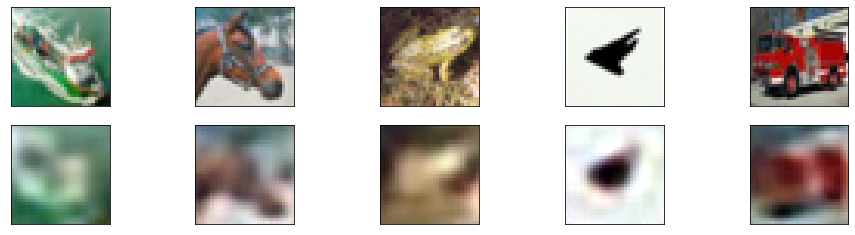

In [ ]:
import matplotlib.pyplot as plt

n= 5
plt.figure(figsize=(16, 4))
for i in range(n):
  ax= plt.subplot(2, n, i + 1)
  plt.imshow(x_test[15+(i+i)])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[15+(i+i)])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Autoencoder with tuning

from keras.layers.advanced_activations import LeakyReLU
input_img = Input(shape =(32, 32, 3))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(64, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(128, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(256, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = Conv2D(128, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = Conv2D(64, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
encoded = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), padding='same')(x)
x = LeakyReLU(0.3)(x)
x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model (input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_104 (Conv2D)         (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 16, 16, 32)        4640      
                                                                 
 leaky_re_lu_76 (LeakyReLU)  (None, 16, 16, 32)        0   

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size =64, shuffle = True, validation_data=(x_test,x_test))
encoded_imgs = autoencoder.predict(x_test)


Epoch 1/50
782/782 [==============================] - 8s 10ms/step - loss: 0.0631 - val_loss: 0.0668
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0631 - val_loss: 0.0630
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0630 - val_loss: 0.0655
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0627 - val_loss: 0.0630
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0628 - val_loss: 0.0632
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0625 - val_loss: 0.0659
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0623 - val_loss: 0.0625
Epoch 8/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0622 - val_loss: 0.0636
Epoch 9/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0619 - val_loss: 0.0629
Epoch 10/50
782/782 [==============================] - 7s 9ms/step - loss: 0.0621 - val_loss: 0.062

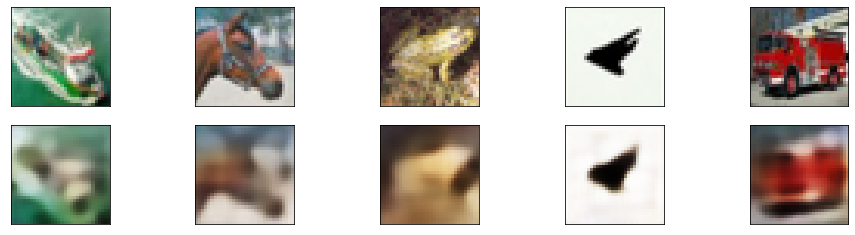

In [ ]:
import matplotlib.pyplot as plt

n= 5
plt.figure(figsize=(16, 4))
for i in range(n):
  ax= plt.subplot(2, n, i + 1)
  plt.imshow(x_test[15+(i+i)])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[15+(i+i)])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()